In [2]:
from sklearn import datasets
from sklearn import neighbors
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [3]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)


In [5]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
def plot(model):
    x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
    y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max() +1
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                       np.arange(y_min,y_max,0.01))
    z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    cs = plt.contourf(xx,yy,z)

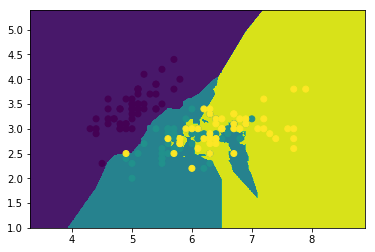

0.7894736842105263

In [11]:
plot(knn)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()
knn.score(x_test,y_test)

In [13]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

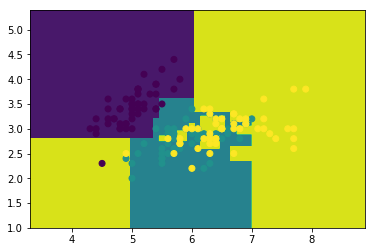

0.7631578947368421

In [14]:
plot(dtree)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()
dtree.score(x_test,y_test)

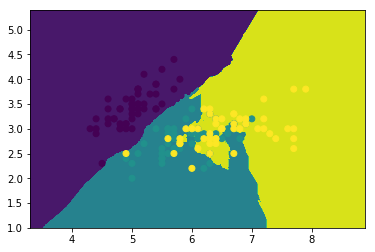

0.868421052631579

In [20]:
bagging_knn = BaggingClassifier(knn,n_estimators=100)
bagging_knn.fit(x_train,y_train)
plot(bagging_knn)

plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
bagging_knn.score(x_test,y_test)

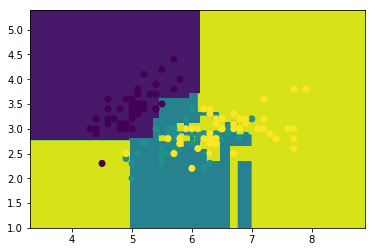

0.7105263157894737

In [17]:
bagging_tree = BaggingClassifier(dtree,n_estimators=100)
bagging_tree.fit(x_train,y_train)
plot(bagging_tree)

plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
bagging_tree.score(x_test,y_test)

In [25]:
a1 = np.array([[1,2,3],[4,5,6]])
b1 = np.array([[0,0,0]])
c = np.r_[a1,b1]#添加行
print(c)

print(a1.ravel())#扁平化

[[1 2 3]
 [4 5 6]
 [0 0 0]]
[1 2 3 4 5 6]


In [27]:
b1 = np.array([0,0,0,0,0,0])
c = np.c_[a1.ravel(),b1.ravel()]#添加列
print(c)

[[1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]]


In [24]:
c = np.c_[a1,b1]
print(c)

ValueError: all the input array dimensions except for the concatenation axis must match exactly